In [23]:
import numpy as np
import matplotlib.pyplot as plt
image_path = '香农博士.jpg'
origin_image = plt.imread(image_path)
rate = 0.8

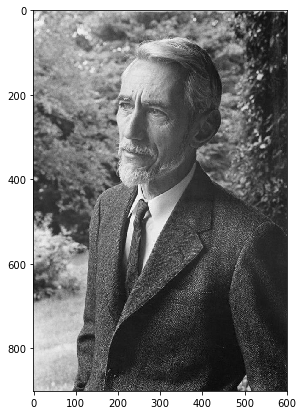

In [24]:
# 显示原图像
plt.figure(figsize= (7, 7))
plt.imshow(origin_image, cmap='gray')
plt.savefig("000.jpg")
plt.show()

总共的特征值个数 600
保留的特征值个数: 148


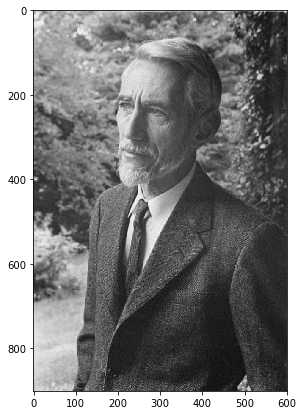

In [25]:
# 提前开辟结果存放空间
result = np.zeros(origin_image.shape)

# 对原图像进行SVD分解
u_shape = 0
s_shape = 0
vT_shape = 0

# 对该层进行SVD分解
U, sigma, V = np.linalg.svd(origin_image)
n_sigmas = 0
temp = 0

# 计算达到保留率需要的奇异值数量
while (temp / np.sum(sigma)) < rate:
    temp += sigma[n_sigmas]
    n_sigmas += 1
print("总共的特征值个数", len(sigma))
print("保留的特征值个数:", n_sigmas)


# 构建奇异值矩阵
S = np.zeros((n_sigmas, n_sigmas))

for i in range(n_sigmas):
    S[i, i] = sigma[i]

# 构建结果
result = (U[:, 0:n_sigmas].dot(S)).dot(V[0:n_sigmas, :])
u_shape = U[:, 0:n_sigmas].shape
s_shape = S.shape
vT_shape = V[0:n_sigmas, :].shape

# 归一化到[0, 1]
MAX = np.max(result)
MIN = np.min(result)
result = (result - MIN) / (MAX - MIN)

# 调整到[0, 255]
result  = np.round(result * 255).astype('int')


# 显示压缩结果
plt.figure(figsize= (7, 7))
plt.imshow(result, cmap='gray')
plt.savefig("111.jpg")
plt.show()

In [26]:
# 计算压缩率
# 源数据像素
oriDpiNum = origin_image.size
newDpiNum = u_shape[0] * u_shape[1] + \
            s_shape[0] * s_shape[1] + \
            vT_shape[0] * vT_shape[1] 
rate = newDpiNum / oriDpiNum
print("保留率:", rate)
print("所用奇异值数量为：", n_sigmas)
print("原图大小：", origin_image.shape)
print("压缩后用到的矩阵大小：({} + {} + {})". format(u_shape, s_shape, vT_shape))
print("压缩率为：", 1 - rate)

保留率: 0.4514465408805031
所用奇异值数量为： 148
原图大小： (901, 600)
压缩后用到的矩阵大小：((901, 148) + (148, 148) + (148, 600))
压缩率为： 0.5485534591194969
